In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, '/SSF')
from DejaVu.explib import get_eval_results
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.min_rows = 100
eval_rets, melted = get_eval_results()
eval_rets

Using backend: pytorch


download finished


,Method,Dataset,备注,A@1,A@2,A@3,A@5,MAR,Time (s),实验路径,command,commit
1,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,65.62,93.75,96.88,100.00,1.44,689.115095,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/1975683694...
2,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,78.12,90.62,90.62,90.62,1.78,1266.835076,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
3,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,90.62,96.88,96.88,100.00,1.16,761.576768,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
4,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,674.506719,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
5,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,849.394423,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
6,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,84.38,96.88,100.00,100.00,1.19,709.856903,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
7,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,59.38,78.12,87.50,96.88,1.84,718.702528,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
8,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,824.153796,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
9,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,2025.395798,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
10,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,75.00,90.62,93.75,93.75,1.53,1744.798878,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...


In [2]:
import re

REGEX = r'^GRU\+GAT-H(?P<H>\d+)-L(?P<L>\d+)\+BAL$'
def __match_GAT(name: str):
    if __match := re.match(REGEX, name):
        __gd = dict(__match.groupdict())
        # print(__gd)
        return int(__gd.get('H', 4)), int(__gd.get('L', 8))
    else:
        return 0, 0
    
def match(the_df):
    the_df = the_df.copy()
    the_df['H'] = the_df.Method.map(
        lambda name: __match_GAT(name)[0]
    )
    the_df['L'] = the_df.Method.map(
        lambda name: __match_GAT(name)[1]
    )
    for m in ['MAR', 'A@1', 'A@2', 'A@3', 'A@5']:
        the_df[m] = pd.to_numeric(the_df[m], errors='coerce')
    return the_df

In [73]:
df1 = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase1'
)])
df1 = df1.groupby(['H', 'L', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
df2 = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase2'
)])
df2 = df2.groupby(['H', 'L', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
dfa = (df1 * 32 + df2 * 46) / (32 + 46)
dfa = dfa.reset_index()
# dfa = pd.concat([df1, df2])
display(dfa)

,H,L,Method,MAR,A@1,A@2,A@3,A@5
0,1,1,GRU+GAT-H1-L1+BAL,2.318513,74.360154,89.617026,93.205974,96.154205
1,1,2,GRU+GAT-H1-L2+BAL,1.781744,75.769179,89.488385,92.949590,96.538692
2,1,4,GRU+GAT-H1-L4+BAL,1.641769,74.102179,88.460769,91.409333,96.667410
3,1,8,GRU+GAT-H1-L8+BAL,2.314538,72.307154,84.872462,89.486026,92.821359
4,1,16,GRU+GAT-H1-L16+BAL,2.915333,70.769846,82.948846,86.667077,91.795821
5,2,1,GRU+GAT-H2-L1+BAL,2.483923,75.385538,90.642282,93.719564,96.794154
6,2,2,GRU+GAT-H2-L2+BAL,1.974718,73.847026,90.641923,93.461949,96.666718
7,2,4,GRU+GAT-H2-L4+BAL,1.704462,74.230282,89.744923,93.590692,97.307821
8,2,8,GRU+GAT-H2-L8+BAL,1.836308,70.384333,86.280769,91.153359,94.614462
9,2,16,GRU+GAT-H2-L16+BAL,2.692744,68.460026,80.770154,86.410897,92.179590


In [72]:
df = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS21-B'
)])

dfb = df.groupby(['H', 'L', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()
# dfb = df
dfb

,H,L,Method,MAR,A@1,A@2,A@3,A@5
0,1,1,GRU+GAT-H1-L1+BAL,6.126,68.031,71.667,76.212,78.333
1,1,2,GRU+GAT-H1-L2+BAL,6.202,66.363,72.426,76.060,78.940
2,1,4,GRU+GAT-H1-L4+BAL,5.565,66.971,72.273,75.606,78.939
3,1,8,GRU+GAT-H1-L8+BAL,6.011,65.606,72.577,75.302,78.788
4,1,16,GRU+GAT-H1-L16+BAL,6.356,66.365,72.879,75.758,78.938
5,2,1,GRU+GAT-H2-L1+BAL,6.589,68.637,72.121,76.062,78.787
6,2,2,GRU+GAT-H2-L2+BAL,5.804,65.305,70.910,74.545,77.271
7,2,4,GRU+GAT-H2-L4+BAL,6.727,60.455,66.667,71.214,75.909
8,2,8,GRU+GAT-H2-L8+BAL,5.220,63.638,70.758,75.001,79.695
9,2,16,GRU+GAT-H2-L16+BAL,4.870,69.396,74.242,76.516,80.150


In [5]:
df = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'CCB-Oracle'
)])

dfc = df.groupby(['H', 'L', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()
dfc

,H,L,Method,MAR,A@1,A@2,A@3,A@5
0,1,1,GRU+GAT-H1-L1+BAL,1.639,61.054,87.367,94.213,97.370
1,1,2,GRU+GAT-H1-L2+BAL,1.817,60.790,84.998,92.371,97.107
2,1,4,GRU+GAT-H1-L4+BAL,1.723,59.211,83.684,92.106,96.318
3,1,8,GRU+GAT-H1-L8+BAL,1.836,59.208,81.316,87.632,95.792
4,1,16,GRU+GAT-H1-L16+BAL,1.829,63.949,84.473,89.210,97.107
5,2,1,GRU+GAT-H2-L1+BAL,1.699,61.843,86.843,91.579,96.318
6,2,2,GRU+GAT-H2-L2+BAL,1.707,58.947,84.737,92.371,96.581
7,2,4,GRU+GAT-H2-L4+BAL,1.814,62.895,83.421,89.211,96.581
8,2,8,GRU+GAT-H2-L8+BAL,1.811,62.107,83.947,89.474,94.213
9,2,16,GRU+GAT-H2-L16+BAL,2.214,59.474,76.316,83.685,91.845


In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
def plot_impact_of_head_and_layer(data):
    data = data.copy()
    fig = plt.figure(figsize=(0.5 * len(data['L'].unique()) + 0.5, 0.5 * len(data['H'].unique())), dpi=300)
    ax = plt.axes()
#     df['MAR'] = df['MAR'].map(np.log)
    sns.heatmap(data=data.pivot(index='H', columns='L', values='MAR'), cmap='Blues_r', vmin=1, vmax=data.MAR.max() * 1.5,)
    plt.xlabel("$L$")
    plt.ylabel("$H$")
    plt.close(fig)
    return fig

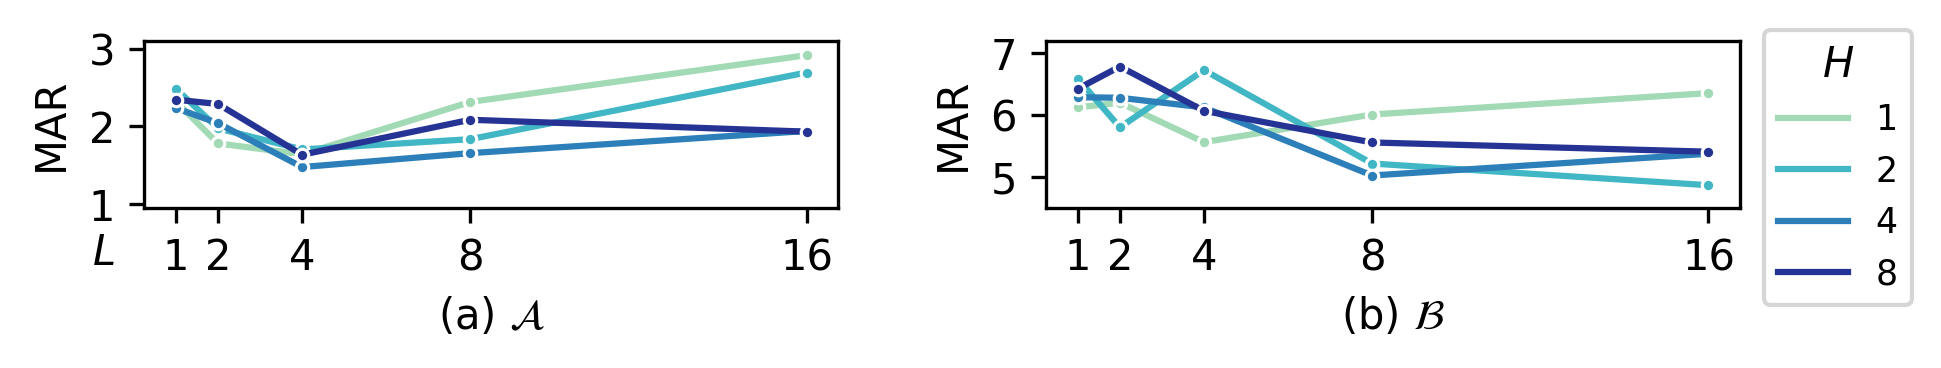

In [107]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(6, 1.3), dpi=300, sharey=False)
sns.lineplot(data=dfa, x="L", hue="H", y="MAR", palette=['#a1dab4','#41b6c4','#2c7fb8','#253494'], ax=axes[0], marker=".")
axes[0].set_ylim([0.95, 3.1])
axes[0].text(-1, 0.22, "$L$")
axes[0].set_xlabel("(a) $\mathcal{A}$")
axes[0].legend_.set_visible(False)
axes[0].set_xticks([1, 2, 4, 8, 16])

sns.lineplot(data=dfb, x="L", hue="H", y="MAR", palette=['#a1dab4','#41b6c4','#2c7fb8','#253494'], ax=axes[1], marker=".")
axes[1].set_ylim([4.5, 7.2])
axes[1].set_xlabel("(b) $\mathcal{B}$")
axes[1].legend_.set_visible(False)
axes[1].set_xticks([1, 2, 4, 8, 16])

fig.legend(*axes[1].get_legend_handles_labels(), bbox_to_anchor=(1.08, 0.95), ncol=1, fontsize="small", title="$H$")

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
fig.savefig('/SSF/output/impact_of_gat_architecture/impact_GAT.pdf', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close(fig)

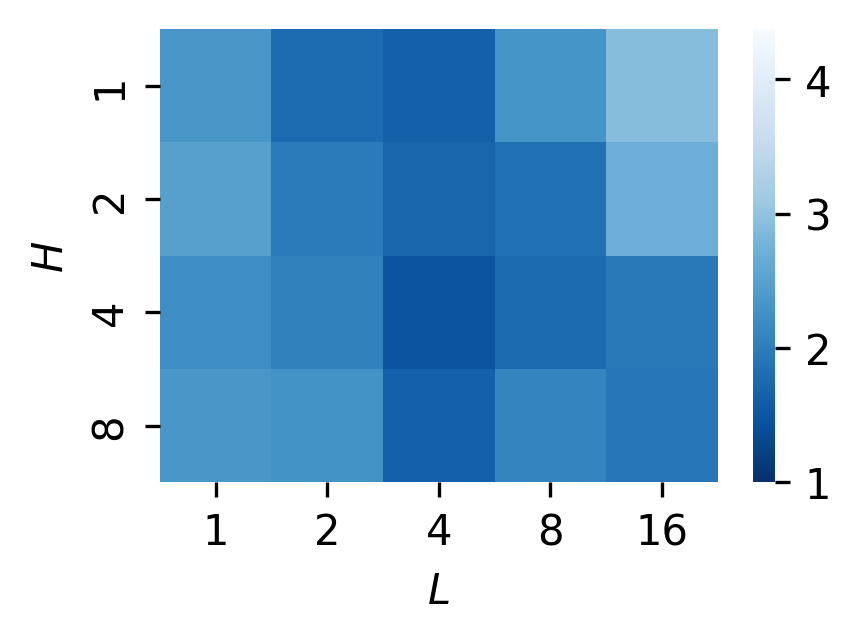

In [20]:
fig = plot_impact_of_head_and_layer(dfa)
fig.savefig('/SSF/output/impact_of_gat_architecture/A.pdf', bbox_inches='tight', pad_inches=0)
display(fig)

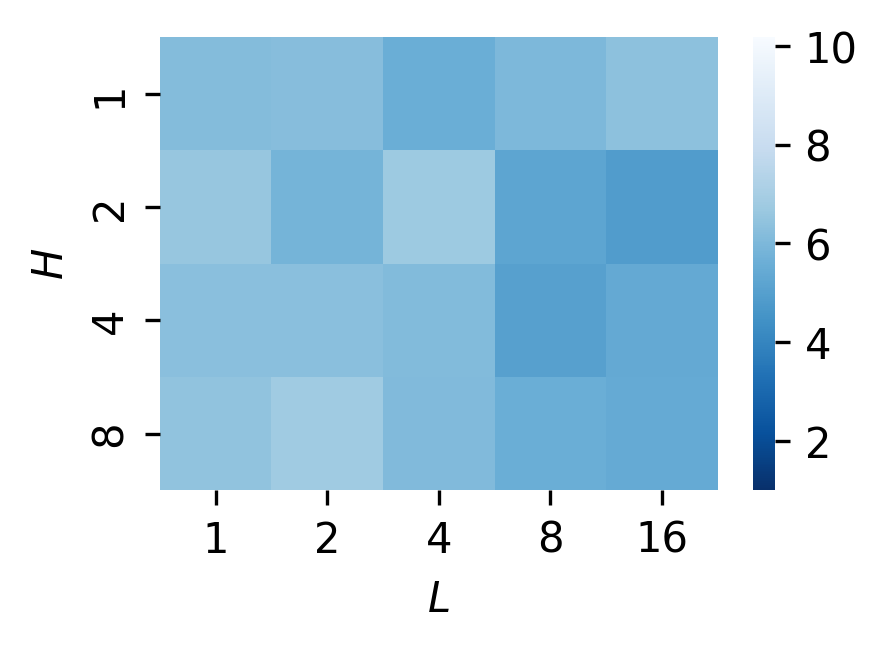

In [13]:
fig = plot_impact_of_head_and_layer(dfb)
fig.savefig('/SSF/output/impact_of_gat_architecture/B.pdf', bbox_inches='tight', pad_inches=0)
display(fig)

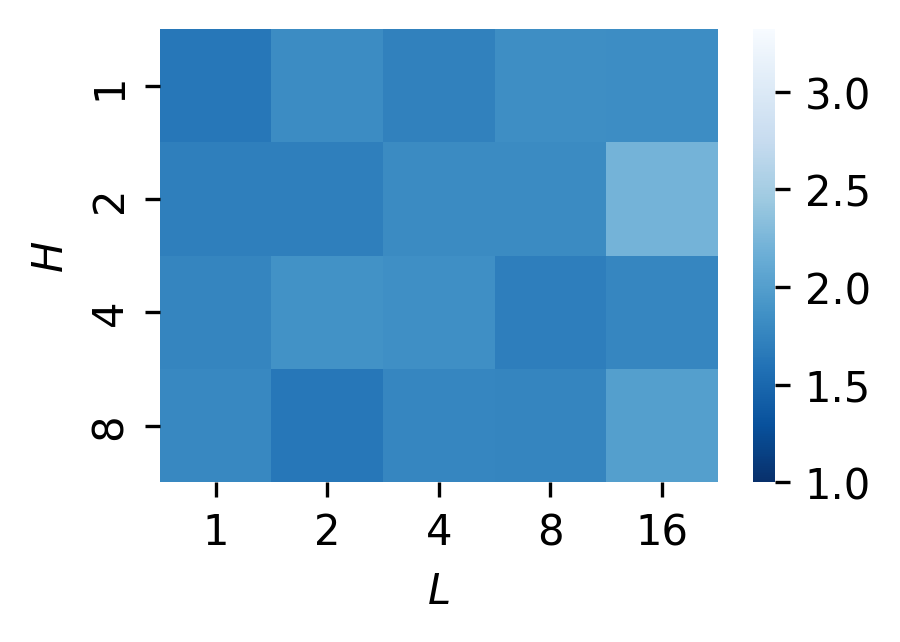

In [14]:
fig = plot_impact_of_head_and_layer(dfc)
fig.savefig('/SSF/output/impact_of_gat_architecture/C.pdf', bbox_inches='tight', pad_inches=0)
display(fig)